In [1]:
from fastai.text.all import *
from pathlib import Path

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
torch.__version__

'1.13.1+cu117'

In [3]:
torch.cuda.is_available()

True

In [4]:
path_top21 =  Path('data/train21_shuffled.csv')
df = pd.read_csv(path_top21)

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
44370,3,5,41,I don't know. It felt far.,Pam,False
44371,3,10,43,"Excuse me [tries to take away meat with chopsticks] Ah, un guard. [Fights with chopsticks and laughs] Family style.",Michael,False
44372,5,23,19,I never went to Thailand.,Ryan,False
44373,3,4,1,"[breathless] All right. Okay. [goes back down pretend stairs, crawls on belly to the kitchen for the coffee]",Michael,False


In [30]:
df_reduced = df.iloc[:10000]

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
9995,6,23,11,"[shouts] Michael Scott, are you still seeing Donna?",Pam,False
9996,7,13,10,I'm out too.,Phyllis,False
9997,1,5,3,I apologized for that.,Dwight,False
9998,5,12,20,"Ok, goodbye Prince Family.",Michael,False


<Axes: >

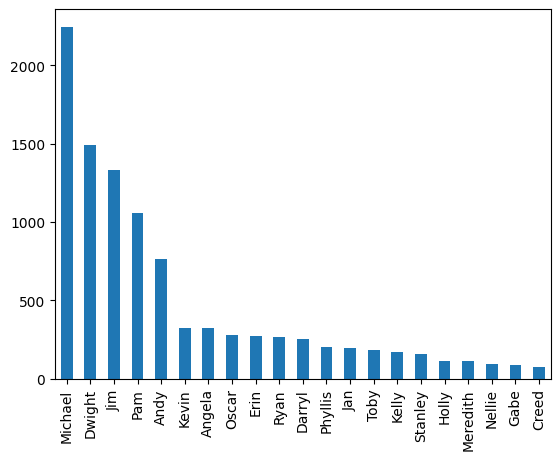

In [31]:
df_reduced['speaker'].value_counts().plot(kind='bar')

In [32]:
max_dialog = df_reduced['speaker'].value_counts().max()

2245

In [33]:
# import random

# dfs_oversampled = [df_reduced]
# for _, group in df_reduced.groupby('speaker'):
#     rand_mult = random.uniform(0.85, 1.15)
#     sample_amt_to_max = max_dialog - len(group)
#     dfs_oversampled.append(group.sample(int(sample_amt_to_max * rand_mult), replace=True))
# df_reduced = pd.concat(dfs_oversampled)

<Axes: >

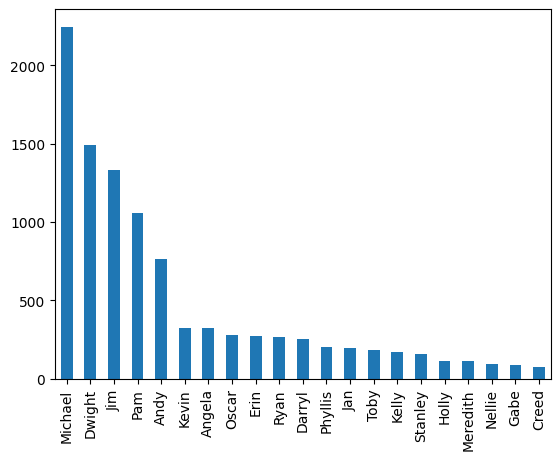

In [35]:
df_reduced['speaker'].value_counts().plot(kind='bar')

In [36]:
dls = TextDataLoaders.from_df(df_reduced, text_col='line_text', label_col='speaker', shuffle_train=True)
df_train = dls.train.items

,season,episode,scene,speaker,deleted,text,text_length
9790,5,4,44,Pam,False,"[xxbos, xxmaj, if, i, get, you, a, slice, of, pizza, ,, are, we, even, ?]",15
221,5,16,22,Dwight,False,"[xxbos, xxmaj, dwight, xxup, k., xxmaj, schrute, ., xxmaj, why, do, n't, you, introduce, me, to, your, little, friend, ?, [, dwight, immediately, breaks, the, handshake, with, the, redhead, and, turns, to, the, blonde, ], xxmaj, hi, ,, xxmaj, dwight, .]",41
9515,6,5,29,Andy,False,"[xxbos, xxmaj, whoa, ., xxmaj, okay, .]",7
6360,1,6,40,Toby,True,"[xxbos, xxmaj, yeah, ,, me, too, .]",7
4386,9,10,29,Jim,False,"[xxbos, xxmaj, are, you, kidding, me, ?, i, can, literally, scalp, tickets, to, this, .]",15
...,...,...,...,...,...,...,...
1269,2,7,47,Jan,True,"[xxbos, xxmaj, what, ?]",4
9771,6,6,19,Jim,False,"[xxbos, i, was, gon, na, go, with, this, one, .]",10
1029,7,21,41,Dwight,False,"[xxbos, [, smiles, knowingly, ]]",5
4558,6,12,33,Jim,False,"[xxbos, xxmaj, what, ?]",4


In [37]:
max_dialog = df_train['speaker'].value_counts().max()
import random

dfs_oversampled = [df_train]
for _, group in df_train.groupby('speaker'):
    rand_mult = random.uniform(0.85, 1.15)
    sample_amt_to_max = max_dialog - len(group)
    dfs_oversampled.append(group.sample(int(sample_amt_to_max * rand_mult), replace=True))
df_train = pd.concat(dfs_oversampled)

,season,episode,scene,speaker,deleted,text,text_length
9790,5,4,44,Pam,False,"[xxbos, xxmaj, if, i, get, you, a, slice, of, pizza, ,, are, we, even, ?]",15
221,5,16,22,Dwight,False,"[xxbos, xxmaj, dwight, xxup, k., xxmaj, schrute, ., xxmaj, why, do, n't, you, introduce, me, to, your, little, friend, ?, [, dwight, immediately, breaks, the, handshake, with, the, redhead, and, turns, to, the, blonde, ], xxmaj, hi, ,, xxmaj, dwight, .]",41
9515,6,5,29,Andy,False,"[xxbos, xxmaj, whoa, ., xxmaj, okay, .]",7
6360,1,6,40,Toby,True,"[xxbos, xxmaj, yeah, ,, me, too, .]",7
4386,9,10,29,Jim,False,"[xxbos, xxmaj, are, you, kidding, me, ?, i, can, literally, scalp, tickets, to, this, .]",15
...,...,...,...,...,...,...,...
6152,8,13,16,Toby,False,"[xxbos, xxmaj, ernesto, !]",4
9145,8,4,16,Toby,False,"[xxbos, xxmaj, it, 's, a, finicky, car, …]",8
8069,1,6,12,Toby,False,"[xxbos, xxmaj, hey, ,, um, did, you, go, to, uh, ,, xxmaj, bishop, o'hara, ?]",15
1136,1,2,16,Toby,False,"[xxbos, xxmaj, hey, ,, we, 're, not, all, going, to, sit, in, a, circle, xxmaj, indian, style, are, we, ?, [, laughing, ]]",23


In [38]:
dls.train.items = df_train

SuggestedLRs(valley=0.015848932787775993)

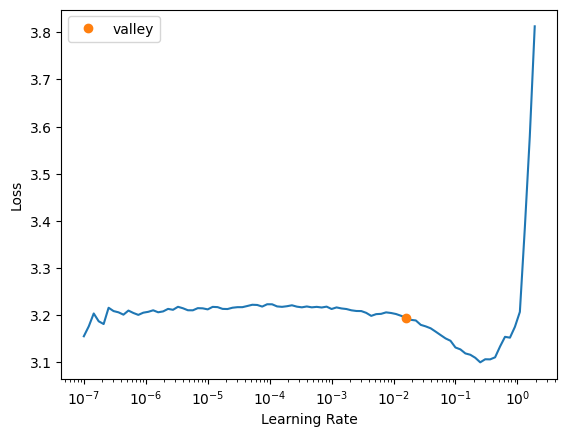

In [39]:
learner = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learner.lr_find()
# learner.fine_tune(10, 1e-2)
# suggestedLR = 0.00363

In [40]:
suggested_lr = 0.0132

0.0132

In [41]:
learner.fine_tune(20, suggested_lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.762512,2.587914,0.152500,00:03


epoch,train_loss,valid_loss,accuracy,time
0,2.523221,2.516847,0.220000,00:05
1,2.489826,2.525592,0.214000,00:05
2,2.466979,2.524840,0.214500,00:05
3,2.429484,2.555749,0.188000,00:05
4,2.381419,2.565664,0.223500,00:05
5,2.287300,2.608196,0.219000,00:05
6,2.152138,2.665757,0.223500,00:05
7,1.943805,2.804038,0.204000,00:05
8,1.671553,2.978027,0.222500,00:05
9,1.534485,3.222391,0.213000,00:05


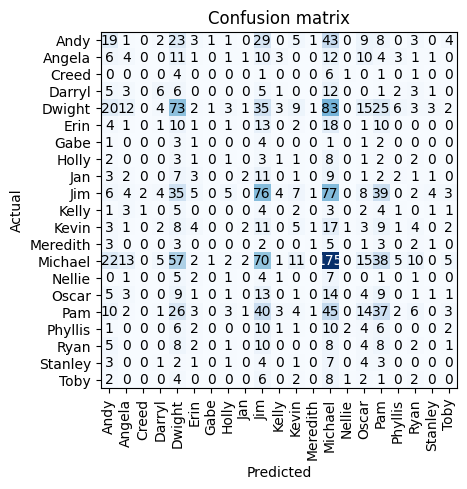

In [42]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [43]:
learner.fine_tune(10, suggested_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.622481,4.387259,0.203000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.607368,4.383348,0.192500,00:05
1,0.637636,4.385289,0.208000,00:05
2,0.754783,4.177393,0.193000,00:05
3,0.899087,4.009594,0.199000,00:05
4,0.823260,4.118748,0.211000,00:05
5,0.634741,4.315139,0.199000,00:05
6,0.543141,4.227736,0.193500,00:05
7,0.543953,4.239326,0.201000,00:05
8,0.408880,4.266242,0.203500,00:05
9,0.437515,4.356253,0.200500,00:05


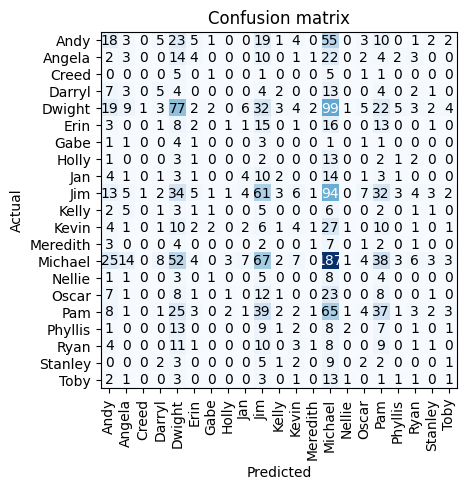

In [44]:
interp.plot_confusion_matrix()

In [45]:
dls.show_batch()

,text,category
0,"xxbos xxmaj ah , look at me . xxmaj i 'm huge in xxunk - xxunk . xxmaj xxunk xxunk , xxmaj michael xxmaj scott . xxmaj not comedy xxunk here , which is fine because not having a sense of humor is just as fine as having one . xxmaj questions ? xxmaj comment ? xxmaj ca n't see you , but i know that you 're not breathing . i know you 're breathing . xxmaj is this on ? xxmaj hello ? ' well , is n't that … xxmaj well , is n't that special ? ' ' xxunk - o xxunk . ' xxmaj bill xxmaj cosby . i think xxmaj bill xxmaj cosby said it best when he talked about his brother and all of the fun he … xxmaj all the great things they did together as kids . xxmaj and there was",Michael
1,"xxbos xxmaj look , i am not a xxunk . i ca n't … i ca n't dress like xxmaj donald xxmaj xxunk dresses . i have to stay within the xxunk of my budget . i ca n't shop at a fancy xxmaj xxunk xxunk . i buy my xxunk the old fashioned way . i buy them from discount stores … or on ebay . xxmaj and when i found out that xxmaj xxunk was having a midnight xxunk sale , i ran , not walked , as per the instructions on the xxunk . xxmaj and i got there , and when the doors opened , all of these women ran to this one xxunk . xxmaj and i did too . xxmaj and i grabbed this suit . xxmaj and a woman , sort of a , i do n't know , xxmaj xxunk xxmaj elliot",Michael
2,"xxbos xxmaj oh ! xxmaj seven new comments . ' the guy at 0:19 is hawt ! ' [ typing ] ' hi xxmaj xxunk , it 's me , xxmaj andy . xxmaj the guy from 0:19 , xxmaj i 'm glad that you enjoyed my work in that xxunk . i really enjoyed your comment , going to read some more comments now . xxmaj have a great xxunk ] ' he 's not hawt , he 's gay . ' [ typing ] ' dear xxunk , it 's me , xxmaj andy . xxmaj nice name . xxmaj not ! xxmaj guess what ? xxmaj i 'm not gay ! xxmaj so you are an xxup idiot . xxmaj and i am hawt , according to people on this xxunk who have a brain . xxmaj never comment on this page ever again . ' [",Andy
3,"xxbos [ clears throat and stands ] xxmaj ladies and gentlemen of … the … table . i would just like to say what a joy it is for me to be here today , but frankly , at my age , it 's a joy to be anywhere [ no one laughs ] . xxmaj i 'm only forty - four , so xxmaj i 'm not old , and i guess that does n't really play . xxmaj but the point is , i have a sense of humor . xxmaj and i xxunk you all to have a sense of humor as well . xxmaj jan , xxmaj david , my wonderful girlfriend [ xxunk xxmaj jan , then turns to xxmaj david xxmaj wallace ] , my gorgeous company … xxmaj why do n't we all just take a big deep breath … and just relax",Michael
4,"xxbos xxmaj no , sit down . ' xxunk . ' xxmaj well , the xxmaj christmas shopping season is certainly a busy one , back - to - school is , as well , and in early summer it seems to slow down a bit , but shopping is also xxunk . xxmaj the xxunk cycle xxunk every choice a woman makes . xxmaj you see , during xxunk , a woman 's only goal is to get pregnant , and during xxunk , she is sad that she has failed . xxmaj and how does the woman xxunk herself ? xxmaj shopping . xxmaj shopping . xxmaj just- xxmaj jim , could you xxunk me some ice chips ? xxmaj thank you . xxmaj just gon na … take a … xxunk pause at this point . [ jim gives xxmaj dwight a bowl of ice chips ]",Dwight
5,"xxbos i understand . xxmaj it 's in a blind spot because xxmaj i 'm trained in several martial arts and one of them , uh , xxunk , uh , an awareness that the xxunk bring , uh , of anything on all sides of you . xxmaj it could be behind you or whatever . xxmaj this is directly in a blind spot , so xxmaj i 'm trained to xxunk xxunk to something right above my head . [ new take ] xxmaj this now i have an eye on . xxmaj you see , it 's on my xxunk and if i needed to block it , attack it , stop it somehow . [ does a martial arts move with his hands ] i could come right out . i mean , i know you 're doing your job , but … xxmaj documentary xxmaj",Dwight
6,"xxbos xxmaj this is a little chara

In [55]:
learner.predict("on the beet farm")

('Holly',
 tensor(7),
 tensor([0.0660, 0.0673, 0.0031, 0.0272, 0.0275, 0.0315, 0.0087, 0.3273, 0.0501,
         0.0072, 0.0369, 0.0404, 0.0013, 0.0812, 0.0382, 0.1285, 0.0121, 0.0006,
         0.0063, 0.0259, 0.0128]))

In [47]:
learner.show_results()

,text,category,category_
0,"xxbos xxmaj aw , thanks , xxmaj pete . xxmaj that was really nice . i just want to say how happy we are that all of you are here tonight . xxmaj and i want to especially thank those of you who xxunk from far away to be here with us tonight … especially the xxmaj xxunk xxunk who , obviously , ca n't take a hint . [ laughter ] xxmaj four years ago , i was just a guy who had a crush on a girl who had a boyfriend . xxmaj and i had to do the hardest thing that xxmaj i 've ever had to do … which was just to wait . xxmaj uh , do n't get me wrong . i xxunk with her . xxmaj pam , i can now admit in front of my friends and family that i do know",Jim,Michael
1,"xxbos [ andy plus two xxunk on the phone singing ] xxmaj if you change your mind , xxmaj i 'll be first in line . xxmaj honey , xxmaj i 'm still free , take a chance on me . xxmaj if you need me let me know , gon na be around . xxmaj if you got no place to go , if you 're feeling down . xxmaj if your all alone when the pretty xxunk have xxunk , honey xxmaj i 'm still free , take a chance on me . xxmaj gon na do my very best , and that ai n't no lie , if you put me to the test , if you let me try . xxmaj take a chance on me , that 's all i ask of you xxmaj angela . xxmaj take a chance on me .",Andy,Andy
2,"xxbos [ video xxunk ] xxmaj and finally , xxmaj pam xxmaj beesly . xxmaj look at her . xxmaj look how cute . xxmaj not bad at all . xxmaj as the receptionist , xxmaj pam is truly the xxunk to our world . xxmaj well , i hope this gave you a little taste of what life is like here at xxmaj dunder xxmaj mifflin , xxmaj scranton . xxmaj what it 's like to walk a xxunk in xxmaj oscar 's shoes . xxmaj or try on xxmaj phyllis ' pants . xxmaj maybe even one of xxmaj angela 's famous xxunk . xxmaj and you 'll know , that you 're home . [ video says , ' great xxmaj scott ! ' ]",Michael,Michael
3,"xxbos xxup ok , xxup ok , xxmaj fine . xxmaj yeah , actually , perfect . xxmaj perfect . xxmaj you know what ? xxmaj there 's another side to this place , gentleman . xxmaj and i know we all love our xxunk jobs and our fun , exciting office . xxmaj but do you realize that xxunk us , there 's another world . xxmaj the warehouse world . a world that is xxunk with xxunk and dirt and life . xxmaj life . xxmaj the xxunk of the office . xxmaj these guys are down there , they are real men doing real man 's work . xxmaj we are going to learn how a warehouse works .",Michael,Michael
4,"xxbos [ leaving a message ] xxmaj hey , xxmaj jan . xxmaj it 's me , xxmaj michael . xxmaj i 'm just calling to say that i think we need a little break , xxunk . xxmaj and , uh , i know everybody says this , but xxup i - i wanna remain friends . xxmaj or at least business xxunk who get along . xxmaj oh , just so you know , it 's not me , it 's you . [ jan walks in ] xxup ok , buddy . xxmaj somebody just walked in . i have to go . xxmaj um , so xxmaj i 'll talk to you later .",Michael,Michael
5,"xxbos xxmaj hey , hey , hey , hey , hey , hey , hey , hey xxup it guy . xxmaj here 's the story , xxunk . xxmaj none of us have spent a lot of time getting to know you , okay ? xxmaj we liked the last guy , xxmaj xxunk , because he kept to himself , and we also thought he might have been a xxunk . xxmaj you know what , xxmaj i 'm going to leave you with one other thought . xxmaj xxunk city kids use computers for two things , games and porn . xxmaj so good luck wasting your life , xxunk .",Dwight,Michael
6,"xxbos i do n't xxunk justice often . xxmaj i 'm not like xxmaj angela , who calls a lawyer every time someone watches a xxunk video of animals doing it . xxmaj but , someone should get fired over this , right ? xxmaj val 's no help . xxmaj andy 's gone . xxmaj jim 's out . i just feel like xxmaj i 'm on my own here . [ boom microphone bumps her head , she smiles ] i mean , xxup ok , not completely on my own . xxmaj but , in terms of people who can do something . xxmaj thank you , xxmaj brian .",Pam,Dwight


In [48]:
learner.predict("hes totally qualified, and smart, everyone loves him")

('Michael',
 tensor(13),
 tensor([1.9945e-05, 4.9462e-06, 5.3716e-04, 4.3246e-05, 2.1276e-04, 1.3596e-05,
         6.4641e-05, 1.4724e-05, 2.2408e-04, 1.9690e-03, 2.2156e-04, 7.1812e-06,
         2.0497e-05, 9.8770e-01, 8.5815e-03, 1.9998e-05, 3.7338e-05, 1.7086e-04,
         1.0249e-04, 7.6711e-06, 3.0421e-05]))

In [36]:
# learner.save('30epoch_15000_lines')

Path('models/30epoch_15000_lines.pth')